## <b> The Play Store apps data has enormous potential to drive app-making businesses to success. Actionable insights can be drawn for developers to work on and capture the Android market. </b>

## <b> Each app (row) has values for catergory, rating, size, and more. Another dataset contains customer reviews of the android apps.</b>

## <b> Explore and analyze the data to discover key factors responsible for app engagement and success. </b>

# Topic To Project

---

* Introduction to data - [Done]- Anupam
* Importing libraries - [Done] - Anupam
* Importing dataset - [Done] -Anupam
* Basic Data Exploration(Understanding the Dataset) - [Inprogress] - Anupam
* Data Cleaning - [Inprogress] - Aswin
  * Checking for null values
  * Delete data duplicated
  * Check Qutliers
* Exploratory Data Analysis (EDA) - [To Do] - For All
  * Sentiment analysis of user reviews - [To Do] - Aditya
* Check Co-relation - [To Do]
* CONCLUSION - [To Do] - This at the End of coding
* Visualization - [Inprogress] - Anupam
* Modularity of code - [To Do]


# Mounted Google Drive

---



In [58]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# **Introduction to data**

---



# datasets/apps.csv
This file contains all the details of the apps on Google Play. There are 9 features that describe a given app.
* **App:** Name of the app
* **Category**: Category of the app. Some examples are: ART_AND_DESIGN, FINANCE, COMICS, BEAUTY etc.
* **Rating:** The current average rating (out of 5) of the app on Google Play
* **Reviews:** Number of user reviews given on the app
* **Size:** Size of the app in MB (megabytes)
* **Installs: **Number of times the app was downloaded from Google Play
* **Type:** Whether the app is paid or free
* **Price:** Price of the app in US$
* **Last Updated:** Date on which the app was last updated on Google Play

# datasets/user_reviews.csv
This file contains a random sample of 100 [most helpful first](https://play.google.com/about/comment-posting-policy/) user reviews for each app. The text in each review has been pre-processed and passed through a sentiment analyzer.
* **App:** Name of the app on which the user review was provided. Matches the `App` column of the `apps.csv` file
* **Review:** The pre-processed user review text
Sentiment Category: Sentiment category of the user review - Positive, Negative or Neutral
* **Sentiment Score:** Sentiment score of the user review. It lies between [-1,1]. A higher score denotes a more positive sentiment.



# **Importing libraries**

---






In [59]:
#import library
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import numpy as np # linear algebra
import matplotlib.pyplot as plt
import seaborn as sns  # visualization tool

# **Importing Dataset**

---

In [60]:
path_anupam = '/content/drive/MyDrive/Colab Notebooks/AlmaBetter/Exploratory Data Analysis (EDA)/Play Store Data.csv'
#path_anupam = 
#path_aswin = '/content/drive/MyDrive/Colab Notebooks/Capstone EDA/Play Store Data.csv'

apps = pd.read_csv(path_anupam) 
#review = pd.

# **Basic Data Exploration(Understanding the Dataset)**

---

**We will check the below things:**
* head of the dataset
* tail of the dataset
* the shape of the dataset
* datatypes for every column
* summary of the dataset

In [61]:
apps.head()


,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [62]:
apps.tail()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10836,Sya9a Maroc - FR,FAMILY,4.5,38,53M,"5,000+",Free,0,Everyone,Education,"July 25, 2017",1.48,4.1 and up
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3.6M,100+,Free,0,Everyone,Education,"July 6, 2018",1.0,4.1 and up
10838,Parkinson Exercices FR,MEDICAL,NaN,3,9.5M,"1,000+",Free,0,Everyone,Medical,"January 20, 2017",1.0,2.2 and up
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,Varies with device,"1,000+",Free,0,Mature 17+,Books & Reference,"January 19, 2015",Varies with device,Varies with device
10840,iHoroscope - 2018 Daily Horoscope & Astrology,LIFESTYLE,4.5,398307,19M,"10,000,000+",Free,0,Everyone,Lifestyle,"July 25, 2018",Varies with device,Varies with device


In [63]:
# Take a sample of 5
apps.sample(5)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
4670,Pocket U ASW,FAMILY,3.9,93,28M,"10,000+",Free,0,Everyone,Education,"July 25, 2018",3.0.6,4.2 and up
2405,Nursing Central,MEDICAL,4.3,168,5.8M,"10,000+",Free,0,Everyone,Medical,"January 29, 2018",2.7.38,4.1 and up
942,The NBC App - Watch Live TV and Full Episodes,ENTERTAINMENT,4.1,58028,17M,"5,000,000+",Free,0,Teen,Entertainment,"July 5, 2018",4.18.1,4.1 and up
1103,Simple - Better Banking,FINANCE,4.4,7731,24M,"100,000+",Free,0,Everyone,Finance,"August 2, 2018",2.53.2,5.0 and up
667,Black People Meet Singles Date,DATING,3.9,10212,5.0M,"1,000,000+",Free,0,Mature 17+,Dating,"July 25, 2018",1.9.7,4.4 and up


In [64]:
# Take a data shape
apps.shape

(10841, 13)

In [65]:
#Get the colums info
apps.columns

Index(['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type',
       'Price', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver',
       'Android Ver'],
      dtype='object')

In [66]:
#The described method will help to see how data has been spread for numerical values.
# We can clearly see the minimum value, mean values, different percentile values, and maximum values.
apps.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
App,10841,9660,ROBLOX,9,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Category,10841,34,FAMILY,1972,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Rating,9367,NaN,NaN,NaN,4.19334,0.537431,1,4,4.3,4.5,19
Reviews,10841,6002,0,596,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Size,10841,462,Varies with device,1695,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Installs,10841,22,"1,000,000+",1579,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Type,10840,3,Free,10039,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Price,10841,93,0,10040,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Content Rating,10840,6,Everyone,8714,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Genres,10841,120,Tools,842,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [67]:
#info() is used to check the Information about the data and the datatypes of each respective attribute.
apps.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


# Data Cleaning

---



Dataset can contain missing data, numerical string value, various cues. Working with an uncleaned data could lead to unexpected errors and might make the conclusions drawn from the analysis skewed. So its always a good practise to clean the data first and it also makes the analysis easier. 

#Category

In [68]:
#displaying all the distinct categories of apps in the data set

In [69]:
apps["Category"].unique()

array(['ART_AND_DESIGN', 'AUTO_AND_VEHICLES', 'BEAUTY',
       'BOOKS_AND_REFERENCE', 'BUSINESS', 'COMICS', 'COMMUNICATION',
       'DATING', 'EDUCATION', 'ENTERTAINMENT', 'EVENTS', 'FINANCE',
       'FOOD_AND_DRINK', 'HEALTH_AND_FITNESS', 'HOUSE_AND_HOME',
       'LIBRARIES_AND_DEMO', 'LIFESTYLE', 'GAME', 'FAMILY', 'MEDICAL',
       'SOCIAL', 'SHOPPING', 'PHOTOGRAPHY', 'SPORTS', 'TRAVEL_AND_LOCAL',
       'TOOLS', 'PERSONALIZATION', 'PRODUCTIVITY', 'PARENTING', 'WEATHER',
       'VIDEO_PLAYERS', 'NEWS_AND_MAGAZINES', 'MAPS_AND_NAVIGATION',
       '1.9'], dtype=object)

There is category value as '1.9' which looks like a wrong entry. So let us find out which row it corresponds to

In [70]:
#displaying rows that has category value as "1.9"
apps[apps['Category'] == '1.9']


,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10472,Life Made WI-Fi Touchscreen Photo Frame,1.9,19.0,3.0M,"1,000+",Free,0,Everyone,NaN,"February 11, 2018",1.0.19,4.0 and up,NaN


It looks like the category column entry was missed and the rating got stored instead as category and so on. So lets just shift the whole data in the row towards right by one column and then store NaN value in category column

In [71]:
apps.loc[10472] = apps.loc[10472].shift()
apps['App'].loc[10472] = apps['Category'].loc[10472]
apps['Category'].loc[10472] = np.nan
apps.loc[10472].reset_index()

,index,10472
0,App,Life Made WI-Fi Touchscreen Photo Frame
1,Category,NaN
2,Rating,1.9
3,Reviews,19
4,Size,3.0M
5,Installs,"1,000+"
6,Type,Free
7,Price,0
8,Content Rating,Everyone
9,Genres,NaN


In [72]:
apps.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   App             10841 non-null  object
 1   Category        10840 non-null  object
 2   Rating          9367 non-null   object
 3   Reviews         10841 non-null  object
 4   Size            10841 non-null  object
 5   Installs        10841 non-null  object
 6   Type            10840 non-null  object
 7   Price           10841 non-null  object
 8   Content Rating  10841 non-null  object
 9   Genres          10840 non-null  object
 10  Last Updated    10841 non-null  object
 11  Current Ver     10833 non-null  object
 12  Android Ver     10839 non-null  object
dtypes: object(13)
memory usage: 1.1+ MB


#Lets convert Rating, Size, Reviews, Installs and Price from object to numeric types

**Rating**

In [73]:
apps['Rating'].unique()

array([4.1, 3.9, 4.7, 4.5, 4.3, 4.4, 3.8, 4.2, 4.6, 3.2, 4.0, nan, 4.8,
       4.9, 3.6, 3.7, 3.3, 3.4, 3.5, 3.1, 5.0, 2.6, 3.0, 1.9, 2.5, 2.8,
       2.7, 1.0, 2.9, 2.3, 2.2, 1.7, 2.0, 1.8, 2.4, 1.6, 2.1, 1.4, 1.5,
       1.2, '1.9'], dtype=object)

In [74]:
#convterting Rating from object to float using astype()
apps['Rating'] = apps['Rating'].astype(float)

In [75]:
apps.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10840 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10841 non-null  object 
 9   Genres          10840 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10839 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


**Reviews**



In [76]:
#displaying all distinct values in Reviews
apps['Reviews'].unique()

array(['159', '967', '87510', ..., '603', '1195', '398307'], dtype=object)

In [77]:
#converting reviews from object to integer
apps["Reviews"] = apps["Reviews"].astype(int)

In [78]:
apps.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10840 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  int64  
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10841 non-null  object 
 9   Genres          10840 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10839 non-null  object 
dtypes: float64(1), int64(1), object(11)
memory usage: 1.1+ MB


**Size**

Lets first take a peak of the data stored in size column

In [79]:
apps['Size'].unique()

array(['19M', '14M', '8.7M', '25M', '2.8M', '5.6M', '29M', '33M', '3.1M',
       '28M', '12M', '20M', '21M', '37M', '2.7M', '5.5M', '17M', '39M',
       '31M', '4.2M', '7.0M', '23M', '6.0M', '6.1M', '4.6M', '9.2M',
       '5.2M', '11M', '24M', 'Varies with device', '9.4M', '15M', '10M',
       '1.2M', '26M', '8.0M', '7.9M', '56M', '57M', '35M', '54M', '201k',
       '3.6M', '5.7M', '8.6M', '2.4M', '27M', '2.5M', '16M', '3.4M',
       '8.9M', '3.9M', '2.9M', '38M', '32M', '5.4M', '18M', '1.1M',
       '2.2M', '4.5M', '9.8M', '52M', '9.0M', '6.7M', '30M', '2.6M',
       '7.1M', '3.7M', '22M', '7.4M', '6.4M', '3.2M', '8.2M', '9.9M',
       '4.9M', '9.5M', '5.0M', '5.9M', '13M', '73M', '6.8M', '3.5M',
       '4.0M', '2.3M', '7.2M', '2.1M', '42M', '7.3M', '9.1M', '55M',
       '23k', '6.5M', '1.5M', '7.5M', '51M', '41M', '48M', '8.5M', '46M',
       '8.3M', '4.3M', '4.7M', '3.3M', '40M', '7.8M', '8.8M', '6.6M',
       '5.1M', '61M', '66M', '79k', '8.4M', '118k', '44M', '695k', '1.6M',
     

We can be seen that data has metric prefixes (Kilo and Mega) along with another string. So lets Replace k and M with their values to convert values to numeric.

In [80]:
apps['Size']=apps['Size'].str.replace('M','000')
apps['Size']=apps['Size'].str.replace('k','')
apps['Size']=apps['Size'].replace("Varies with device",np.nan)


In [81]:
#Converting Size to float type using astype()
apps['Size']=apps['Size'].astype(float)
apps['Size']

0        19000.0
1        14000.0
2            8.7
3        25000.0
4            2.8
          ...   
10836    53000.0
10837        3.6
10838        9.5
10839        NaN
10840    19000.0
Name: Size, Length: 10841, dtype: float64

Now all the values are in kilos, we can convert this into mega values which will make it more easier to handle.

In [82]:
#first converting all mega values with floating points in them into kilo(one which were less than 10)
for i in apps['Size']:
    if i < 10:
        apps['Size']=apps['Size'].replace(i,i*1000)
#now converting every value back to mega
apps['Size']=apps['Size']/1000
apps['Size']

0        19.0
1        14.0
2         8.7
3        25.0
4         2.8
         ... 
10836    53.0
10837     3.6
10838     9.5
10839     NaN
10840    19.0
Name: Size, Length: 10841, dtype: float64

**Install and Price**

In [83]:
#displaying values in Install
apps['Installs'].unique()

array(['10,000+', '500,000+', '5,000,000+', '50,000,000+', '100,000+',
       '50,000+', '1,000,000+', '10,000,000+', '5,000+', '100,000,000+',
       '1,000,000,000+', '1,000+', '500,000,000+', '50+', '100+', '500+',
       '10+', '1+', '5+', '0+', '0'], dtype=object)

In [84]:
#displaying values in Price
apps['Price'].unique()

array(['0', '$4.99', '$3.99', '$6.99', '$1.49', '$2.99', '$7.99', '$5.99',
       '$3.49', '$1.99', '$9.99', '$7.49', '$0.99', '$9.00', '$5.49',
       '$10.00', '$24.99', '$11.99', '$79.99', '$16.99', '$14.99',
       '$1.00', '$29.99', '$12.99', '$2.49', '$10.99', '$1.50', '$19.99',
       '$15.99', '$33.99', '$74.99', '$39.99', '$3.95', '$4.49', '$1.70',
       '$8.99', '$2.00', '$3.88', '$25.99', '$399.99', '$17.99',
       '$400.00', '$3.02', '$1.76', '$4.84', '$4.77', '$1.61', '$2.50',
       '$1.59', '$6.49', '$1.29', '$5.00', '$13.99', '$299.99', '$379.99',
       '$37.99', '$18.99', '$389.99', '$19.90', '$8.49', '$1.75',
       '$14.00', '$4.85', '$46.99', '$109.99', '$154.99', '$3.08',
       '$2.59', '$4.80', '$1.96', '$19.40', '$3.90', '$4.59', '$15.46',
       '$3.04', '$4.29', '$2.60', '$3.28', '$4.60', '$28.99', '$2.95',
       '$2.90', '$1.97', '$200.00', '$89.99', '$2.56', '$30.99', '$3.61',
       '$394.99', '$1.26', '$1.20', '$1.04'], dtype=object)

We can remove '$' sign in Price column data and plus(+) and comma signs in Installs column. To do this create a list "items_to_remove" and add these signs to it. And also create another list "cols_to_clean" with names of both the columns we want to clean. Then iterate through these columns using each of the signs in the "items_to_remove" list. We can do this by making use of nested for loops.

In [85]:
#list to store items to remove
items_to_remove=['+',',','$']
#list to store labels of columns to clean
cols_to_clean=['Installs','Price']
#nested for loop
for item in items_to_remove:
    for col in cols_to_clean:
        apps[col]=apps[col].str.replace(item,'')
apps.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19.0,10000,Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14.0,500000,Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7,5000000,Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25.0,50000000,Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8,100000,Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [86]:
#converting Installs and Price to integer and float data type
apps['Installs']=apps['Installs'].astype(int)
apps['Price']=apps['Price'].astype(float)

In [87]:
apps.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10840 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  int64  
 4   Size            9146 non-null   float64
 5   Installs        10841 non-null  int64  
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  float64
 8   Content Rating  10841 non-null  object 
 9   Genres          10840 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10839 non-null  object 
dtypes: float64(3), int64(2), object(8)
memory usage: 1.1+ MB


**Last Updated**

Late Updated can be converted from object to date data type

In [88]:
apps['Last Updated'] = pd.to_datetime(apps['Last Updated'])
apps['Last Updated']

0       2018-01-07
1       2018-01-15
2       2018-08-01
3       2018-06-08
4       2018-06-20
           ...    
10836   2017-07-25
10837   2018-07-06
10838   2017-01-20
10839   2015-01-19
10840   2018-07-25
Name: Last Updated, Length: 10841, dtype: datetime64[ns]

We can also replace updated date with three new columns, namely updated day , month and year so that more exclusive analysis can be done on this data.

In [89]:
apps['Updated_Day']=apps['Last Updated'].dt.day
apps['Updated_Month']=apps['Last Updated'].dt.month
apps['Updated_Year']=apps['Last Updated'].dt.year
apps.drop('Last Updated', axis=1, inplace=True)
apps.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Current Ver,Android Ver,Updated_Day,Updated_Month,Updated_Year
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19.0,10000,Free,0.0,Everyone,Art & Design,1.0.0,4.0.3 and up,7,1,2018
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14.0,500000,Free,0.0,Everyone,Art & Design;Pretend Play,2.0.0,4.0.3 and up,15,1,2018
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7,5000000,Free,0.0,Everyone,Art & Design,1.2.4,4.0.3 and up,1,8,2018
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25.0,50000000,Free,0.0,Teen,Art & Design,Varies with device,4.2 and up,8,6,2018
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8,100000,Free,0.0,Everyone,Art & Design;Creativity,1.1,4.4 and up,20,6,2018


In [90]:
apps.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10840 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  int64  
 4   Size            9146 non-null   float64
 5   Installs        10841 non-null  int64  
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  float64
 8   Content Rating  10841 non-null  object 
 9   Genres          10840 non-null  object 
 10  Current Ver     10833 non-null  object 
 11  Android Ver     10839 non-null  object 
 12  Updated_Day     10841 non-null  int64  
 13  Updated_Month   10841 non-null  int64  
 14  Updated_Year    10841 non-null  int64  
dtypes: float64(3), int64(5), object(7)
memory usage: 1.2+ MB


#Checking for null values

In [91]:
null = pd.DataFrame({'Null Values' : apps.isna().sum().sort_values(ascending=False), 'Percentage Null Values' : (apps.isna().sum().sort_values(ascending=False)) / (apps.shape[0]) * (100)})
null

,Null Values,Percentage Null Values
Size,1695,15.635089
Rating,1474,13.596532
Current Ver,8,0.073794
Android Ver,2,0.018448
Genres,1,0.009224
Type,1,0.009224
Category,1,0.009224
Updated_Year,0,0.000000
Updated_Month,0,0.000000
Updated_Day,0,0.000000


<BarContainer object of 15 artists>

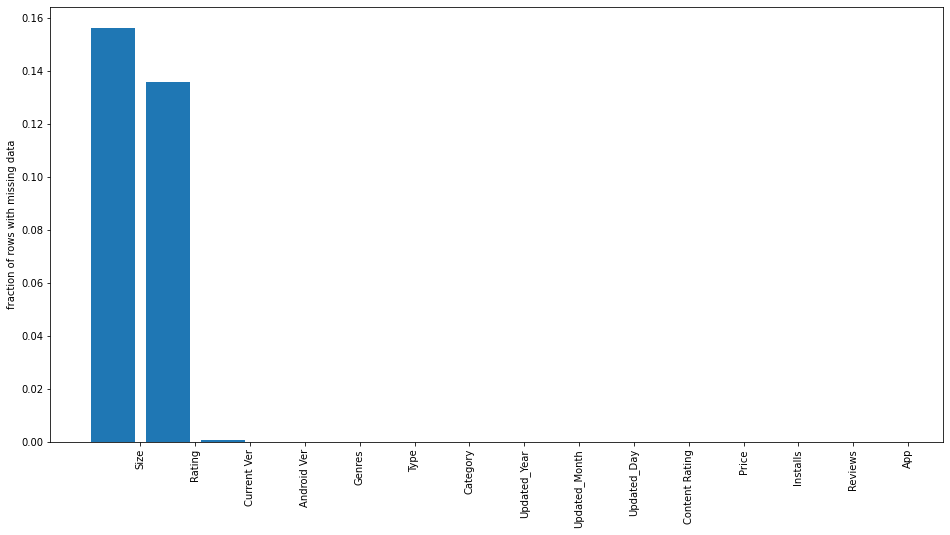

In [92]:
null_counts = apps.isna().sum().sort_values(ascending=False)/len(apps)
plt.figure(figsize=(16,8))
plt.xticks(np.arange(len(null_counts))+0.5,null_counts.index,rotation='vertical')
plt.ylabel('fraction of rows with missing data')
plt.bar(np.arange(len(null_counts)),null_counts)

In [93]:
#We can replace the null values in rating  with mean of ratings

In [94]:
#replacing nan values using mean()
apps['Rating'] = apps.Rating.replace(np.nan,apps['Rating'].mean())
apps['Size'] = apps.Size.replace(np.nan,apps['Size'].mean())

In [95]:
del null
null = pd.DataFrame({'Null Values' : apps.isna().sum().sort_values(ascending=False), 'Percentage Null Values' : (apps.isna().sum().sort_values(ascending=False)) / (apps.shape[0]) * (100)})
null

,Null Values,Percentage Null Values
Current Ver,8,0.073794
Android Ver,2,0.018448
Genres,1,0.009224
Type,1,0.009224
Category,1,0.009224
Updated_Year,0,0.000000
Updated_Month,0,0.000000
Updated_Day,0,0.000000
Content Rating,0,0.000000
Price,0,0.000000


#Deletion of duplicated data

In [96]:
duplicate = apps.duplicated()
print(duplicate.sum())

483


In [97]:
apps.drop_duplicates(inplace=True)

In [98]:
duplicate = apps.duplicated()
print(duplicate.sum())

0


In [99]:
#Write code here

# Exploratoey Data Analysis

Plotting the Reviews vs Category graph

In [100]:
category_list = list(apps['Category'].unique())
category_review = []
for i in category_list:
    x = apps[apps['Category'] == i]
    if(len(x)!=0):
        review = sum(x.Reviews)/len(x)
        category_review.append(review)
    else:
        review = sum(x.Reviews)
        category_review.append(review)

In [101]:
#sorting
data_category_reviews = pd.DataFrame({'category': category_list,'review':category_review})
new_index = (data_category_reviews['review'].sort_values(ascending=False)).index.values
sorted_data =data_category_reviews.reindex(new_index)

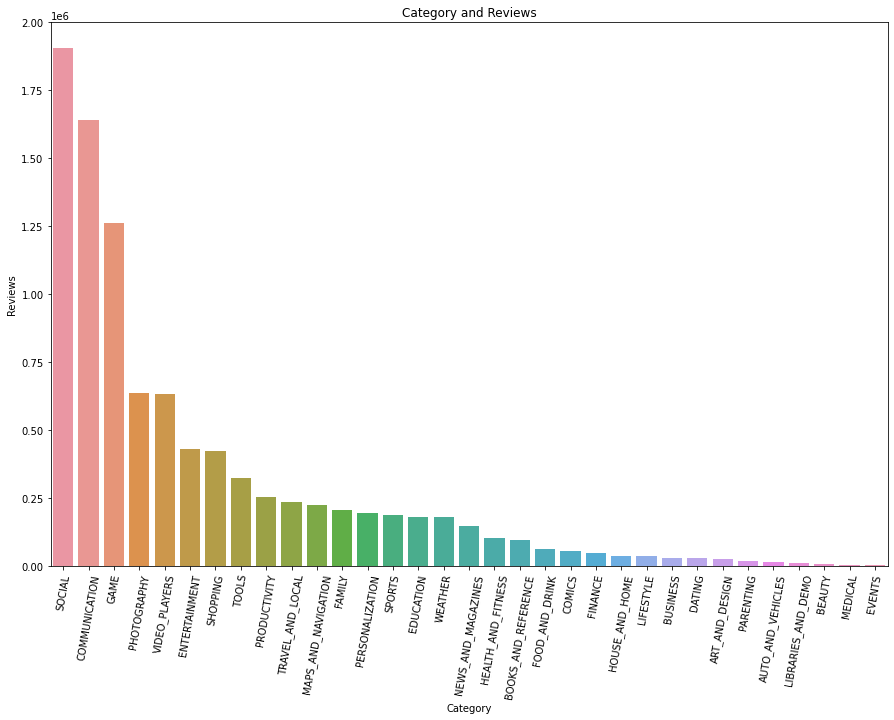

In [102]:
#visualization
plt.figure(figsize=(15,10))
sns.barplot(x=sorted_data['category'], y=sorted_data['review'])
plt.xticks(rotation=80)
plt.xlabel("Category")
plt.ylabel("Reviews")
plt.title("Category and Reviews")
plt.show()

**# CONCLUSION**

---


[Anupam]CONCLUSION-